## Factores del rendimiento estudiantil
El conjunto de datos que se estudia en este analisis proporciona una visión completa de diversos factores que afectan el rendimiento de los estudiantes en los exámenes. Incluye información sobre hábitos de estudio, asistencia, participación de los padres y otros aspectos que influyen en el éxito académico.
Esta compuesto por las siguientes columnas:
* Hours_Studied: Número de horas dedicadas al estudio por semana.
* Attendance: Porcentaje de clases asistidas.
* Parental_Involvement: Nivel de participación de los padres en la educación del estudiante (Bajo, Medio, Alto).
* Access_to_Resources: Disponibilidad de recursos educativos (Bajo, Medio, Alto).
* Extracurricular_Activities: Participación en actividades extracurriculares (Sí, No).
* Sleep_Hours: Número promedio de horas de sueño por noche.
* Previous_Scores: Puntuaciones de exámenes anteriores.
* Motivation_Level: Nivel de motivación del estudiante (Bajo, Medio, Alto).
* Internet_Access: Disponibilidad de acceso a internet (Sí, No).
* Tutoring_Sessions: Número de sesiones de tutoría asistidas por mes.
* Family_Income: Nivel de ingresos familiares (Bajo, Medio, Alto).
* Teacher_Quality: Calidad de los profesores (Bajo, Medio, Alto).
* School_Type: Tipo de escuela a la que asiste (Pública, Privada).
* Peer_Influence: Influencia de los compañeros en el rendimiento académico (Positiva, Neutral, Negativa).
* Physical_Activity: Número promedio de horas de actividad física por semana.
* Learning_Disabilities: Presencia de discapacidades de aprendizaje (Sí, No).
* Parental_Education_Level: Nivel de educación más alto de los padres (Escuela secundaria, Universidad, Posgrado).
* Distance_from_Home: Distancia de la casa a la escuela (Cerca, Moderada, Lejos).
* Gender: Género del estudiante (Masculino, Femenino).
* Exam_Score: Puntuación final del examen.


### Objetivos del analisis de datos
El objetivo de este análisis es examinar los hábitos y recursos disponibles para los estudiantes y analizar cómo estos factores se relacionan con sus resultados en los exámenes. La meta es identificar patrones y tendencias que puedan ofrecer una visión más profunda sobre los elementos que influyen en el rendimiento académico.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from scipy.stats import ttest_ind
import pingouin


In [2]:
student_df = pd.read_csv('Data/StudentPerformanceFactors.csv')

In [3]:
student_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Limpieza y correcion de datos

In [6]:
#Pongo como limite de datos nulos a eliminar el 5% de los datos totales. Corroboro que columnas se encuentran debajo de ese limite
null_amount=student_df.isna().sum()
threshold = len(student_df)*0.05
threshold_check=null_amount <= threshold


In [7]:
#Las selecciono entre las columnas del df y las guardo en una variable a para eliminar los datos nulos de ellas
cols_to_drop = student_df.columns[threshold_check]

In [8]:
student_df.dropna(subset=cols_to_drop, inplace=True)

In [9]:
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [10]:
student_df.reset_index(drop=True,inplace=True)
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6374,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6375,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6376,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [11]:
#Corroboro que no queden filas con datos nulos
cols_with_missing_values = student_df.columns[null_amount > 0]
cols_with_missing_values

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [12]:
#Como el valor maximo de 'Exam_Score' es 101, lo cual no es correcto ya que los puntajes llegan hasta 100, elimino las filas con 
#puntaje mayor a 100
lower = 1
upper = 100
outliers = student_df[(student_df['Exam_Score']<lower)| (student_df['Exam_Score']>upper)].index
student_df = student_df.drop(outliers)


In [13]:
student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [14]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   object
 1

In [15]:
columns_to_bool = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
columns_to_string = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 
                     'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Parental_Education_Level', 
                     'Distance_from_Home', 'Gender']
student_df[columns_to_bool] = student_df[columns_to_bool].replace({'Yes': True, 'No': False})
student_df[columns_to_string] = student_df[columns_to_string].astype('string')

C:\Users\elian\AppData\Local\Temp\ipykernel_31756\3126230565.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_df[columns_to_bool] = student_df[columns_to_bool].replace({'Yes': True, 'No': False})


In [16]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   string
 3   Access_to_Resources         6377 non-null   string
 4   Extracurricular_Activities  6377 non-null   bool  
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   string
 8   Internet_Access             6377 non-null   bool  
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   string
 11  Teacher_Quality             6377 non-null   string
 12  School_Type                 6377 non-null   string
 13  Peer_Influence              6377 non-null   string
 1

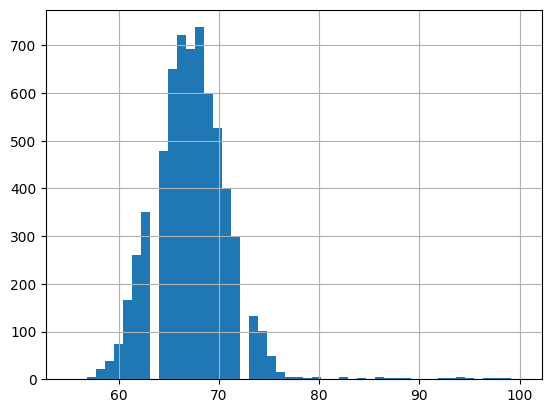

In [17]:
student_df['Exam_Score'].hist(bins=50)
plt.show()

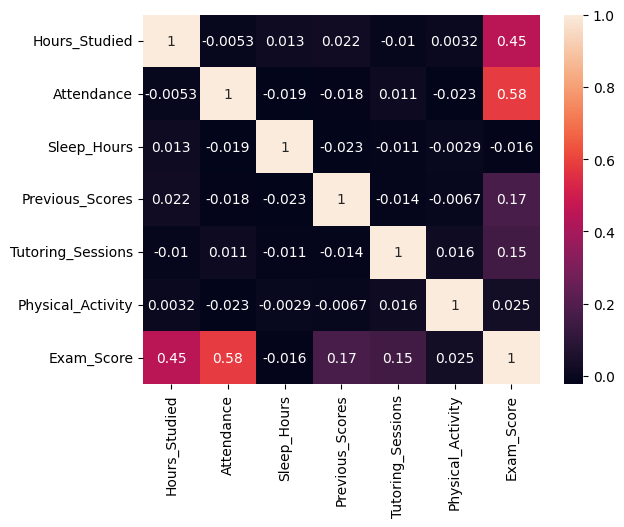

In [18]:
numeric_df = student_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

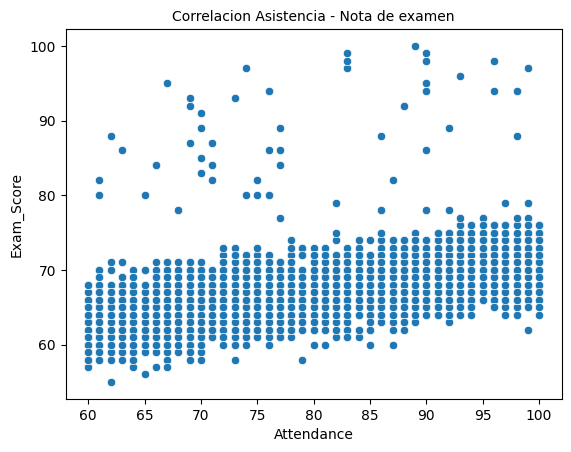

In [19]:
plt.title('Correlacion Asistencia - Nota de examen', size=10)
sns.scatterplot(x='Attendance', y='Exam_Score', data=student_df)
plt.show()

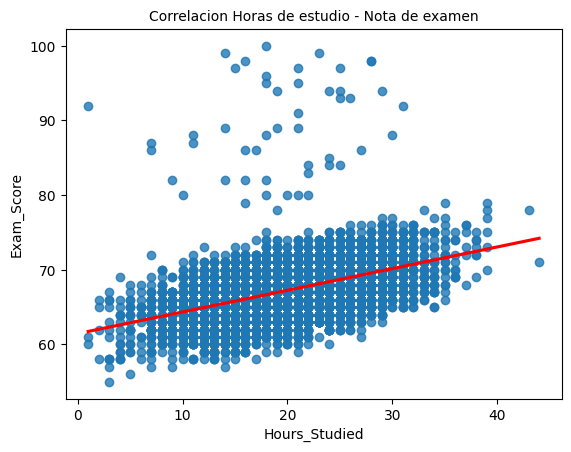

In [20]:
plt.title('Correlacion Horas de estudio - Nota de examen',size=10)
sns.regplot(x='Hours_Studied', y='Exam_Score', data=student_df, ci=None, fit_reg=True, line_kws={'color': 'red'})
plt.show()

Como se puede observar, hay una correlacion positiva entre las horas semanales que los alumnos dedican al estudio, y las clases asistidas con las notas obtenidas por los mismos en el examen de evaluacion de este conjunto de datos.

In [21]:
#Estadisticas basicas de las notas:
print(f'La media de las notas es {student_df['Exam_Score'].mean()}')
print(f'La mediana de las notas es {student_df['Exam_Score'].median()}')
print(f'La moda es {statistics.mode(student_df['Exam_Score'])}')

La media de las notas es 67.24682452563901
La mediana de las notas es 67.0
La moda es 68


Con estas estadisticas basicas podemos observar que la cantidad mas representativa de alumnos obtuvo notas que rondan los 67 - 68 puntos

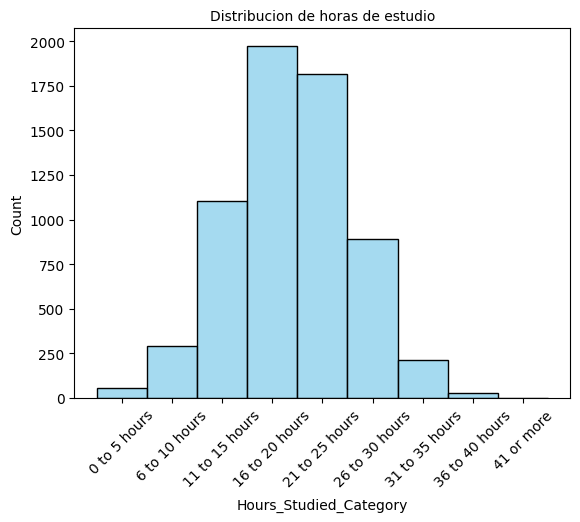

In [22]:
#Promedio de notas por hora de estudio:

labels = ['0 to 5 hours', '6 to 10 hours', '11 to 15 hours', '16 to 20 hours', '21 to 25 hours', '26 to 30 hours', ' 31 to 35 hours', '36 to 40 hours',\
          '41 or more']

bins = [0,5,10,15,20,25,30,35,40,float('inf')]

student_df['Hours_Studied_Category'] = pd.cut(student_df['Hours_Studied'], labels=labels, bins=bins)
plt.title('Distribucion de horas de estudio', size= 10)
plt.xticks(rotation=45)
sns.histplot(data=student_df, x='Hours_Studied_Category', color='skyblue')
plt.show()

In [23]:
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Studied_Category
0,23,84,Low,High,False,7,73,Low,True,0,...,Medium,Public,Positive,3,False,High School,Near,Male,67,21 to 25 hours
1,19,64,Low,Medium,False,8,59,Low,True,2,...,Medium,Public,Negative,4,False,College,Moderate,Female,61,16 to 20 hours
2,24,98,Medium,Medium,True,7,91,Medium,True,2,...,Medium,Public,Neutral,4,False,Postgraduate,Near,Male,74,21 to 25 hours
3,29,89,Low,Medium,True,8,98,Medium,True,1,...,Medium,Public,Negative,4,False,High School,Moderate,Male,71,26 to 30 hours
4,19,92,Medium,Medium,True,6,65,Medium,True,3,...,High,Public,Neutral,4,False,College,Near,Female,70,16 to 20 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25,69,High,Medium,False,7,76,Medium,True,1,...,Medium,Public,Positive,2,False,High School,Near,Female,68,21 to 25 hours
6374,23,76,High,Medium,False,8,81,Medium,True,3,...,High,Public,Positive,2,False,High School,Near,Female,69,21 to 25 hours
6375,20,90,Medium,Low,True,6,65,Low,True,3,...,Medium,Public,Negative,2,False,Postgraduate,Near,Female,68,16 to 20 hours
6376,10,86,High,High,True,6,91,High,True,2,...,Medium,Private,Positive,3,False,High School,Far,Female,68,6 to 10 hours


In [24]:
student_df['Hours_Studied_Category'].value_counts()

Hours_Studied_Category
16 to 20 hours     1973
21 to 25 hours     1819
11 to 15 hours     1102
26 to 30 hours      890
6 to 10 hours       293
 31 to 35 hours     213
0 to 5 hours         56
36 to 40 hours       29
41 or more            2
Name: count, dtype: int64

In [25]:
average_scores = student_df.groupby('Hours_Studied_Category')['Exam_Score'].mean().reset_index()
average_scores

C:\Users\elian\AppData\Local\Temp\ipykernel_31756\4062867199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_scores = student_df.groupby('Hours_Studied_Category')['Exam_Score'].mean().reset_index()


,Hours_Studied_Category,Exam_Score
0,0 to 5 hours,62.678571
1,6 to 10 hours,64.197952
2,11 to 15 hours,65.215064
3,16 to 20 hours,66.728332
4,21 to 25 hours,68.042881
5,26 to 30 hours,69.541573
6,31 to 35 hours,70.732394
7,36 to 40 hours,72.896552
8,41 or more,74.500000


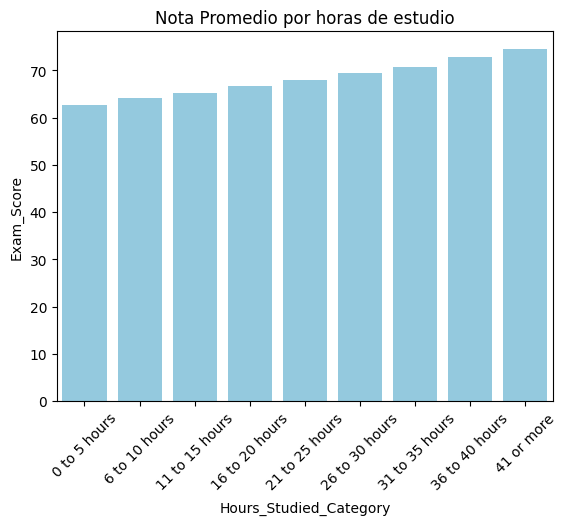

In [26]:
plt.xticks(rotation=45)
plt.title('Nota Promedio por horas de estudio')
sns.barplot(data=average_scores, x='Hours_Studied_Category', y='Exam_Score', color='skyblue')
plt.show()

Con estas visualizaciones podemos reafirmar la corelacion positiva que existe entre las horas de estudio y la nota promedio de cada grupo. Ademas, sabemos que la mayoria de los alumnos se encuentran en los grupos de horas de estudio entre 16 - 20 horas semanales.

In [27]:
#Analisis de excepciones: Estudiantes con notas altas pero pocas horas de estudio, y viceversa
q25_study = student_df['Hours_Studied'].quantile(0.25)
q75_study = student_df['Hours_Studied'].quantile(0.75)
q25_score = student_df['Exam_Score'].quantile(0.25)
q75_score = student_df['Exam_Score'].quantile(0.75)
high_study_low_score = student_df[(student_df['Hours_Studied'] > q75_study) & (student_df['Exam_Score'] < q25_score)]
low_study_high_score = student_df[(student_df['Hours_Studied']< q25_study) & (student_df['Exam_Score']> q75_score)]

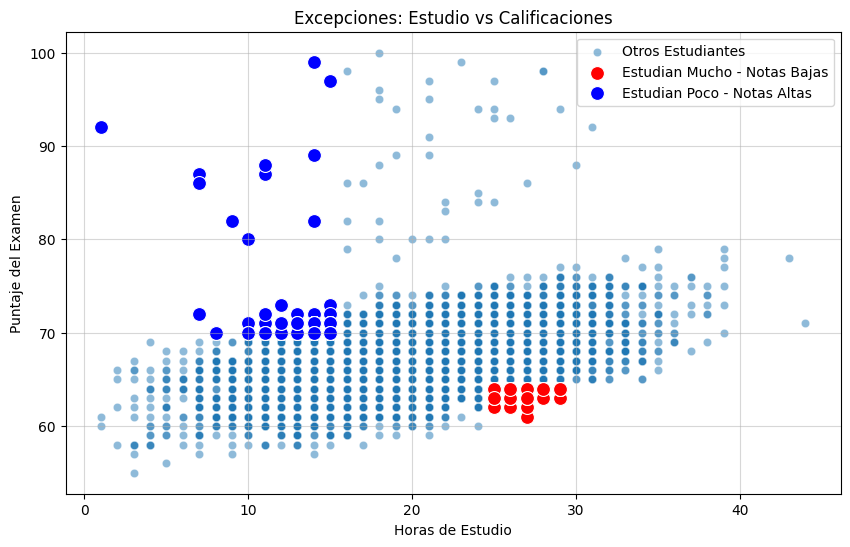

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Hours_Studied', 
    y='Exam_Score', 
    data=student_df, 
    alpha=0.5, 
    label='Otros Estudiantes'
)
sns.scatterplot(
    x=high_study_low_score['Hours_Studied'], 
    y=high_study_low_score['Exam_Score'], 
    color='red', 
    label='Estudian Mucho - Notas Bajas', 
    s=100
)
sns.scatterplot(
    x=low_study_high_score['Hours_Studied'], 
    y=low_study_high_score['Exam_Score'], 
    color='blue', 
    label='Estudian Poco - Notas Altas', 
    s=100
)
plt.title('Excepciones: Estudio vs Calificaciones')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje del Examen')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [29]:
#A que puede deberse que a pesar de dedicar gran cantidad de horas semanales al estudio, logren bajas notas?:
print(high_study_low_score)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
46               26          61               Medium                 Low   
90               26          70               Medium                 Low   
309              25          69                  Low                High   
454              25          63                 High              Medium   
524              26          65                  Low              Medium   
564              27          63               Medium                High   
582              25          70                  Low              Medium   
656              26          61                  Low              Medium   
690              27          72               Medium                 Low   
969              25          60               Medium                 Low   
1054             25          64               Medium                 Low   
1109             26          64                  Low                High   
1135        

0.21


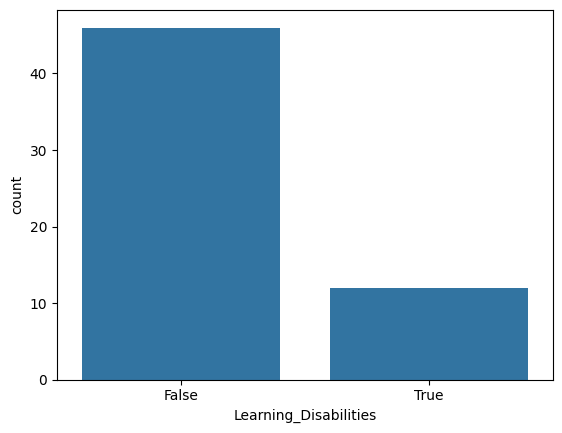

Learning_Disabilities
False    0.793103
True     0.206897
Name: proportion, dtype: float64


In [30]:
high_study_disabilities_mean = high_study_low_score['Learning_Disabilities'].mean().round(2)
print(high_study_disabilities_mean)
sns.countplot(x='Learning_Disabilities', data=high_study_low_score)
plt.show()
print(high_study_low_score['Learning_Disabilities'].value_counts(normalize=True))

In [31]:
high_study_low_score['Internet_Access'].value_counts(normalize=True)

Internet_Access
True     0.896552
False    0.103448
Name: proportion, dtype: float64

In [32]:
#Analizando las medias de las variables: 'Attendance', 'Tutoring_Sessions'
students_attendance_mean = student_df['Attendance'].mean().round(2)
students_tutoring_mean = student_df['Tutoring_Sessions'].mean().round(2)

In [33]:
high_study_attendance_mean=high_study_low_score['Attendance'].mean().round(2)
high_study_tutoring_mean = high_study_low_score['Tutoring_Sessions'].mean().round(2)

In [34]:
print(f'La media de asistencia del total de los alumnos es {students_attendance_mean}, '
      f'mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es {high_study_attendance_mean}')
print(f'La media de clases de tutoria del total de los alumnos es {students_tutoring_mean}, '
      f'mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es {high_study_tutoring_mean}')


La media de asistencia del total de los alumnos es 80.02, mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es 64.55
La media de clases de tutoria del total de los alumnos es 1.49, mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es 0.88


Los alumnos que pertenecen al grupo que a pesar de dedicar mas horas de estudio semanales, obtienen notas relativamente bajas. Esto puede deberse a que la asistencia a clases de este grupo es considerablemente menor a la del total de los alumnos, si consideramos la media de dicha variable. Lo mismo sucede con las clases de tutorias tomadas, son menores que los de la totalidad de los alumnos

In [35]:
low_study_high_score

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Studied_Category
83,15,95,Medium,Medium,False,7,93,Medium,True,2,...,Medium,Public,Positive,4,False,College,Moderate,Male,70,11 to 15 hours
167,15,93,High,Medium,False,6,64,Medium,True,2,...,High,Public,Positive,4,False,Postgraduate,Near,Male,71,11 to 15 hours
420,8,100,High,Medium,True,8,92,Medium,True,1,...,High,Public,Neutral,3,False,Postgraduate,Moderate,Female,70,6 to 10 hours
482,14,89,High,High,True,4,73,Medium,True,2,...,High,Public,Negative,3,False,College,Near,Male,70,11 to 15 hours
515,15,83,Medium,Medium,False,7,97,Medium,True,2,...,High,Private,Neutral,2,False,High School,Near,Female,97,11 to 15 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,11,100,High,High,True,8,58,High,True,1,...,Medium,Private,Positive,3,False,College,Near,Female,70,11 to 15 hours
6234,14,91,Medium,Medium,True,7,95,Medium,True,2,...,High,Public,Positive,2,False,High School,Moderate,Male,70,11 to 15 hours
6265,12,97,High,Low,True,6,96,Medium,True,2,...,High,Public,Positive,2,False,Postgraduate,Near,Female,71,11 to 15 hours
6311,14,97,Medium,Medium,True,7,75,High,True,1,...,Medium,Public,Positive,4,False,College,Near,Female,70,11 to 15 hours


In [36]:
low_study_high_score['Internet_Access'].value_counts(normalize=True)

Internet_Access
True     0.931818
False    0.068182
Name: proportion, dtype: float64

0.056818181818181816


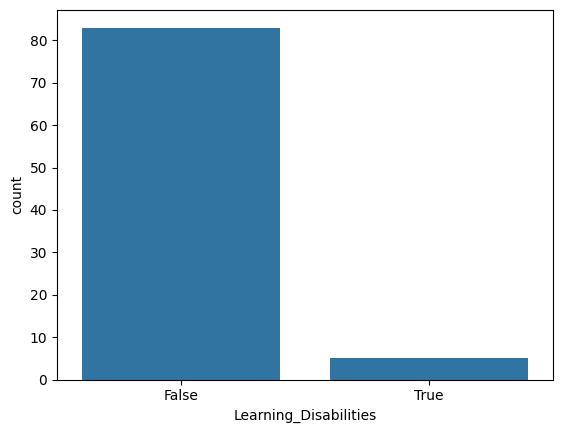

Learning_Disabilities
False    0.943182
True     0.056818
Name: proportion, dtype: float64


In [37]:
low_study_disabilities_mean = low_study_high_score['Learning_Disabilities'].mean()
print(low_study_disabilities_mean)
sns.countplot(x='Learning_Disabilities', data=low_study_high_score)
plt.show()
print(low_study_high_score['Learning_Disabilities'].value_counts(normalize=True))

In [38]:
low_study_attendance_mean=low_study_high_score['Attendance'].mean().round(2)
low_study_tutoring_mean = low_study_high_score['Tutoring_Sessions'].mean().round(2)

In [39]:
print(f'La media de asistencia del total de los alumnos es {students_attendance_mean}, '
      f'mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es {low_study_attendance_mean}')
print(f'La media de clases de tutoria del total de los alumnos es {students_tutoring_mean}, '
      f'mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es {low_study_tutoring_mean}')


La media de asistencia del total de los alumnos es 80.02, mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es 92.47
La media de clases de tutoria del total de los alumnos es 1.49, mientras que la media para los alumnos con notas mas bajas y mayores horas de estudio es 2.12


Se puede ver que hay excepciones de estudiantes que estudian menos horas y obtienen notas mayores, pero en el caso opuesto, los estudiantes que dedican mas horas de estudio, no muestran una gran dispersion hacia notas bajas. De todas formas, del analisis han surgido posibles determinantes de estos resultados:
Los alumnos con menores horas de estudio pero mejores notas tienen, en promedio, mayor asistencia a clases y mayor cantidad de asistencia a tutorias en relacion a la media de la totalidad de los alumnos. En el polo opuesto se encuentran aquellos alumnos que dedican mas horas de estudio y tienen notas mas bajas, con promedios debajo de la media del total de los alumnos, y tambien del otro grupo con el que se compara.
Vale destacar que el grupo con mejores notas tiene un porcentaje mayor de alumnos con acceso a internet, y un pocwrtaje menor de alumnos con discapacidades de aprendizaje en relacion al otro grupo.

A continuacion se probara la siguiente hipotesis:
H₀ (Hipotesis nula): La media de horas de sueño del grupo que estudia mucho y tiene bajas notas es igual a la media de horas de sueño del grupo que estudia poco y tiene altas notas. Por lo tanto, las horas de sueño son un factor determinnte del desempeño.
H₁ (Hipotesis alternativa): Las medias de horas de sueño de los dos grupos son diferentes.

In [40]:
#Prueba de hipotesis a traves del T-Test de muestras independientes
alpha = 0.05
group_high_study_low_score = high_study_low_score['Sleep_Hours']
group_low_study_high_score = low_study_high_score['Sleep_Hours']


In [53]:
ttest_results = pingouin.ttest(group_high_study_low_score, group_low_study_high_score, correction=True)
print(ttest_results)

               T         dof alternative     p-val          CI95%   cohen-d  \
T-test -0.292948  115.611708   two-sided  0.770087  [-0.56, 0.41]  0.050322   

         BF10     power  
T-test  0.189  0.060066  


In [64]:
p_value = ttest_results['p-val'].iloc[0]
p_value

np.float64(0.7700874309908503)

In [65]:
if p_value < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

No se rechaza la hipótesis nula


Gender
Male      0.578328
Female    0.421672
Name: proportion, dtype: Float64


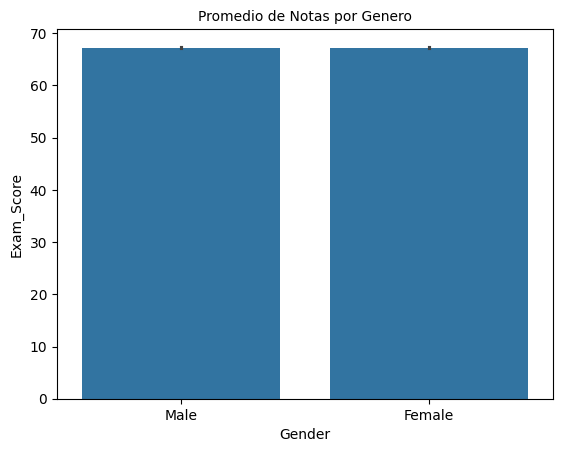

In [42]:
print(student_df['Gender'].value_counts(normalize=True))
plt.title('Promedio de Notas por Genero', size=10)
sns.barplot(x='Gender', y='Exam_Score', data=student_df)
plt.show()

In [43]:
student_df.groupby('School_Type')['Exam_Score'].mean()

School_Type
Private    67.316358
Public     67.216332
Name: Exam_Score, dtype: float64

In [44]:
student_private_school = student_df[student_df['School_Type']=='Private']
student_private_school['Family_Income'].value_counts(normalize=True)

Family_Income
Low       0.413066
Medium    0.399177
High      0.187757
Name: proportion, dtype: Float64

In [45]:
student_public_school = student_df[student_df['School_Type']=='Public']
student_public_school['Family_Income'].value_counts(normalize=True)

Family_Income
Medium     0.40379
Low       0.401308
High      0.194902
Name: proportion, dtype: Float64

Podemos observar que el promedio de notas obtenidas no varia considerablemente segun el genero de los alumnos ni el tipo de escuela al que asisten. Ademas, podemos corroborar que tanto en escuelas publicas como privadas, predominan las familias de ingresos bajos y medios, cada nivel de ingreso con el 40% aproximadamente para ambos tipos de escuela, quedando el nivel de ingresos superiores con menos de un 20%.

In [46]:
#Otros parametros que pueden incluir: la presencia de los padres en cuestiones relacionadas al colegio
student_df.groupby('Parental_Involvement').count()

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Studied_Category
Parental_Involvement,,,,,,,,,,,,,,,,,,,,
High,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
Low,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
Medium,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251


In [47]:
student_df.groupby('Parental_Involvement')['Exam_Score'].mean()

Parental_Involvement
High      68.112200
Low       66.351938
Medium    67.113196
Name: Exam_Score, dtype: float64

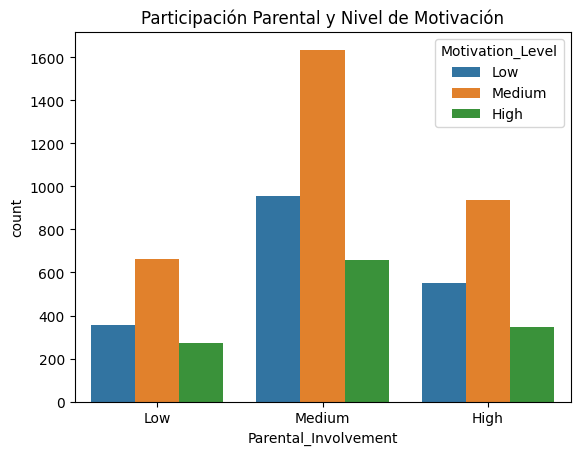

In [48]:
sns.countplot(x='Parental_Involvement', hue='Motivation_Level', data=student_df)
plt.title("Participación Parental y Nivel de Motivación")
plt.show()

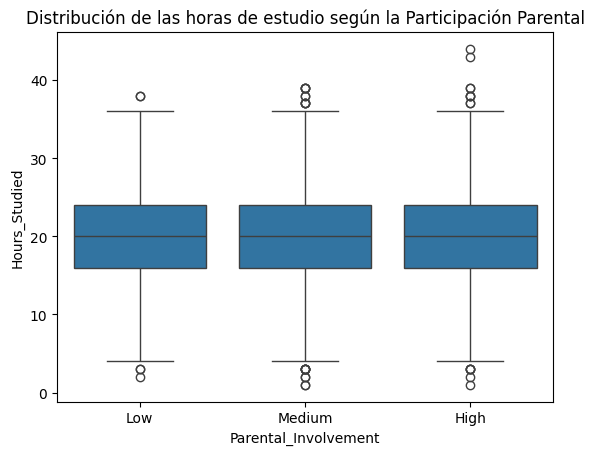

In [49]:
sns.boxplot(x='Parental_Involvement', y='Hours_Studied', data=student_df)
plt.title("Distribución de las horas de estudio según la Participación Parental")
plt.show()

In [50]:
student_df['Learning_Disabilities'].mean()

np.float64(0.10475145052532539)